# Kaggle - TMDB 

### Extract tables

**I decided to use the log of the revenue, and will update the table accordingly**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import math

In [4]:
MILLION = 1000000

In [5]:
train = pd.read_csv('train.csv')

### belong_to_collection

In [6]:
dicts = train[train['belongs_to_collection'].notna()]['belongs_to_collection'].map(
    lambda x: ast.literal_eval(x)[0]).values

In [7]:
# get all collections
collections = [d['id'] for d in dicts]

In [8]:
uniq,counts = np.unique(np.array(collections),return_counts=True)

In [10]:
# without log:
revenues = []
for collection in uniq:
    # select all movies from this collections
    revenues.append(train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==collection]['revenue'].mean())

In [14]:
ave_then_log = np.log(np.array(revenues))

In [15]:
revenues = []
for collection in uniq:
    # select all movies from this collections
    revenues.append(train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==collection]['revenue'].map(math.log).mean())

In [16]:
log_then_ave = np.array(revenues)

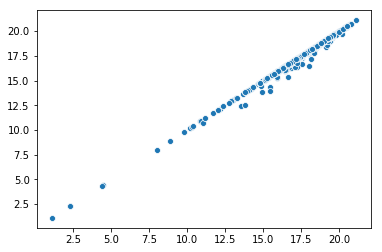

In [17]:
sns.scatterplot(ave_then_log,log_then_ave)

Doesn't make a huge difference, I will try both and see which one works better

In [22]:
revs = np.concatenate((log_then_ave,ave_then_log)).reshape(2,len(log_then_ave)).T

In [24]:
pd.DataFrame(revs,index=uniq,columns=['average_of_logs','log_of_averages']).to_csv('collections.csv')

### genres

In [25]:
# get all genre id lists
genres_lists = train['genres'].fillna('[]').map(
    lambda x: [i['id'] for i in (ast.literal_eval(x))]).values

all_genres = []
for l in genres_lists:
    # add all lists together
    all_genres.extend(l)
# keep only uniques
all_genres = set(all_genres)
# convert back to list
all_genres = list(all_genres)

In [27]:
# build genres table
revenue = []
for g in all_genres:
    revenue.append(train[train['genres'].fillna('[]').map(
        lambda x: g in [i['id'] for i in (ast.literal_eval(x))])]['revenue'].map(math.log).mean())

In [28]:
# build names table
names = []
for i in train['genres'].fillna('[]').map(lambda x: [(i['id'],i['name']) for i in (ast.literal_eval(x))]).values.tolist():
    names.extend(i)
names = set(names)
names = dict(names)
names

{80: 'Crime',
 10770: 'TV Movie',
 53: 'Thriller',
 28: 'Action',
 18: 'Drama',
 10751: 'Family',
 9648: 'Mystery',
 10752: 'War',
 37: 'Western',
 16: 'Animation',
 35: 'Comedy',
 99: 'Documentary',
 10402: 'Music',
 878: 'Science Fiction',
 10749: 'Romance',
 12: 'Adventure',
 10769: 'Foreign',
 36: 'History',
 14: 'Fantasy',
 27: 'Horror'}

In [29]:
ordered_names = [names[i] for i in all_genres]

In [30]:
pd.DataFrame({'name':ordered_names,'log_revenue':revenue},index=all_genres).to_csv('genres.csv')

### Language

In [32]:
train['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
tr       3
hu       3
ml       2
no       2
fi       2
pl       2
te       2
vi       1
bn       1
he       1
ur       1
nb       1
mr       1
el       1
cs       1
sr       1
id       1
ar       1
Name: original_language, dtype: int64

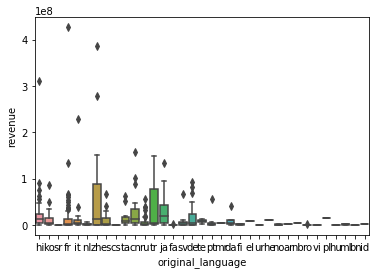

In [33]:
sns.boxplot(x='original_language',y='revenue',data=train[train['original_language']!='en'])

It appears that only the languages that have many values are of interest

In [34]:
languages = train['original_language'].value_counts()

In [35]:
for l in languages.index:
    print(l,int(train[train['original_language']==l]['revenue'].mean()/MILLION) )

en 74
fr 17
ru 6
es 8
hi 25
ja 30
it 16
ko 13
cn 29
zh 70
de 20
ta 14
sv 11
nl 1
pt 10
fa 0
da 11
ro 0
tr 51
hu 0
ml 1
no 1
fi 1
pl 15
te 8
vi 0
bn 0
he 11
ur 0
nb 4
mr 4
el 8
cs 0
sr 0
id 2
ar 1


In [36]:
train[train['original_language']=='tr']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
104,105,"[{'id': 131989, 'name': 'Recep İvedik Serisi',...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3477064,tr,Recep İvedik 4,Recep Ivedik coaches the children football tea...,1.590383,...,2/20/14,117.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Recep İvedik 4,NaN,"[{'cast_id': 2, 'character': 'Recep ƒ∞vedik', ...","[{'credit_id': '5349ae000e0a2640b60005d7', 'de...",149521495
807,808,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt1827487,tr,Bir zamanlar Anadolu'da,A group of men set out in search of a dead bod...,4.433261,...,9/23/11,150.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Once Upon a Time in Anatolia,"[{'id': 1820, 'name': 'trip'}, {'id': 7172, 'n...","[{'cast_id': 12, 'character': 'Doktor Cemal', ...","[{'credit_id': '52fe48e3c3a368484e110295', 'de...",138730
2342,2343,"[{'id': 131989, 'name': 'Recep İvedik Serisi',...",500000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1193516,tr,Recep İvedik,"Adamƒ±n biri yolda c√ºzdanƒ±nƒ± d√º≈ü√ºr√ºr, b...",1.640271,...,2/22/08,90.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Recep İvedik,NaN,"[{'cast_id': 4, 'character': 'Recep ƒ∞vedik', ...","[{'credit_id': '52fe445a9251416c9100dc23', 'de...",5330000


This looks quite suspicious and is perhaps a typo in the data

**I'll use a dictionary to convert the languages and keep only the popular ones (and use 'other' for the rest)**

In [37]:
dict([(l,l) for l in languages[languages>10].index])

{'en': 'en',
 'fr': 'fr',
 'ru': 'ru',
 'es': 'es',
 'hi': 'hi',
 'ja': 'ja',
 'it': 'it',
 'ko': 'ko',
 'cn': 'cn',
 'zh': 'zh',
 'de': 'de',
 'ta': 'ta'}

In [38]:
l_rev = []
for l in languages[languages>10].index:
    l_rev.append((l,train[train['original_language']==l]['revenue'].map(math.log).mean() ))
dict(l_rev)

{'en': 16.201695631547217,
 'fr': 13.718204235553607,
 'ru': 13.815132182879807,
 'es': 14.645970166012837,
 'hi': 15.371121660763546,
 'ja': 15.818050019285394,
 'it': 14.610307296701814,
 'ko': 14.561503498231747,
 'cn': 15.720496475312752,
 'zh': 15.246036823468886,
 'de': 14.583008872938295,
 'ta': 15.073328869838628}

In [43]:
others = []
for l in languages[languages<=10].index:
    others.extend(train[train['original_language']==l]['revenue'].map(math.log).values )

In [47]:
np.array(others).mean()

13.61844005781211